In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import binarize

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

x_train = train[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y_train = train['target']

x_test = test[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y_test = test['target']

# Logistic Regression

In [3]:
model = LogisticRegression(random_state=0).fit(x_train,y_train)
LOG_predict = model.predict(x_test)
LOG_predict

C:\Users\deniz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [4]:
print('Accuracy:', accuracy_score(y_test, LOG_predict)*100, '%')

Accuracy: 86.8421052631579 %


# ROC Curve Function

In [5]:
def roc_curve(predict_probabilities_, thresholds_):
    Sensitivity = []
    Specificity = []
    for i in range(0,len(thresholds)):
        y_class = binarize(predict_probabilities_,thresholds_[i])[:,1]
        y_class = y_class.astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_class).ravel()
        Sensitivity.append(tp / (tp+fn))
        Specificity.append(tn / (tn+fp))
    plt.plot((1- np.array(Specificity)),Sensitivity,'ro-', lw=1)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve - Function')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

Text(0.5, 1.0, 'Sklearn ROC - Logistic')

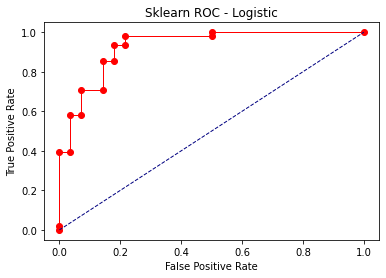

In [6]:
y_pred_proba = model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr, 'ro-', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Sklearn ROC - Logistic')

# Scikit-learn package for ROC Curve

Text(0.5, 1.0, 'Sklearn ROC - Logistic')

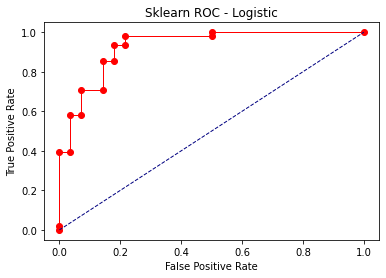

In [7]:
y_pred_proba = model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr, 'ro-', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Sklearn ROC - Logistic')

# LDA

In [8]:
LDA = LinearDiscriminantAnalysis()
model_lda = LDA.fit(x_train, y_train)
LDA_predict = model_lda.predict(x_test)
print('Accuracy:', accuracy_score(y_test, LDA_predict)*100, '%')

Accuracy: 85.52631578947368 %


Text(0.5, 1.0, 'Sklearn ROC - LDA')

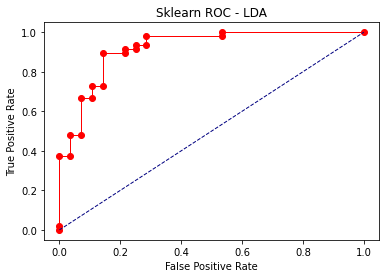

In [9]:
y_pred_proba_lda = model_lda.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_lda[:,1])
plt.plot(fpr, tpr, 'ro-', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Sklearn ROC - LDA')

# Comparison

In [10]:
print('Accuracy of Log Reg:', accuracy_score(y_test, LOG_predict)*100, '%')
print('Accuracy of LDA:', accuracy_score(y_test, LDA_predict)*100, '%')

Accuracy of Log Reg: 86.8421052631579 %
Accuracy of LDA: 85.52631578947368 %
